In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv(r'C:\Users\eev\Documents\Udacity\archive\survey_results_public.csv')

In [3]:
df.shape

(51392, 154)

In [4]:
# 1 Business Understanding

# This Use Case is made for this Course, but to clarify. This Data is conducted by StackOverflow to gather IOnformation from People all over the World
# its covering information about the Jobs what languages they programm in and even the Job sattisfaction.
# my interest is to see if the Satisfaction depends on the income and on the experience (time) they work in the field

In [5]:
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,...,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,...,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,At least once each day,At least once each day,Disagree,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,9 to 10 years,NaN,NaN,NaN,NaN,Data scientist,6.0,3.0,NaN,NaN,NaN,NaN,NaN,...,At least once each week,Several times,At least once each week,Several times,At least once each week,Several times,At least once each day,At least once each day,Agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,10 to 11 years,NaN,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,6.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Here i clean the Data for thge Reasearch i want to do
df = df.dropna(subset=['YearsProgram', 'Gender', 'Salary', 'Country'])

In [7]:
print(df.columns.tolist())

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

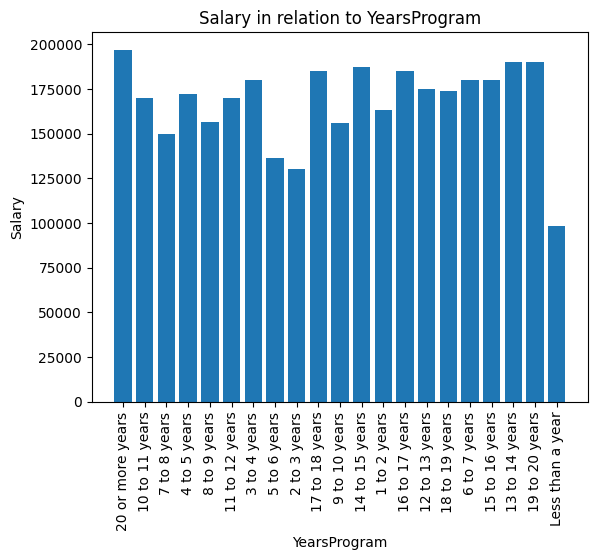

In [8]:
plt.bar(df['YearsProgram'], df['Salary'])
plt.title('Salary in relation to YearsProgram')
plt.xlabel('YearsProgram')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [9]:
#ok like i thought years in the field influence the results of the Salary, now im interested if gender play a role
gender_salary_avg = df.groupby('Gender')['Salary'].mean()
gender_salary_avg_sorted = gender_salary_avg.sort_values(ascending=False)
print(gender_salary_avg_sorted)

Gender
Female; Transgender; Other                                 126000.000000
Female; Transgender; Gender non-conforming                  90750.000000
Transgender                                                 87643.985215
Male; Transgender                                           82033.030303
Female; Transgender                                         78791.988363
Female; Gender non-conforming                               69519.757125
Male; Transgender; Other                                    67500.000000
Male; Gender non-conforming; Other                          66000.000000
Gender non-conforming                                       63672.172798
Male; Gender non-conforming                                 60440.697719
Other                                                       58133.780908
Female                                                      58104.420681
Male                                                        57006.325810
Transgender; Gender non-conforming          

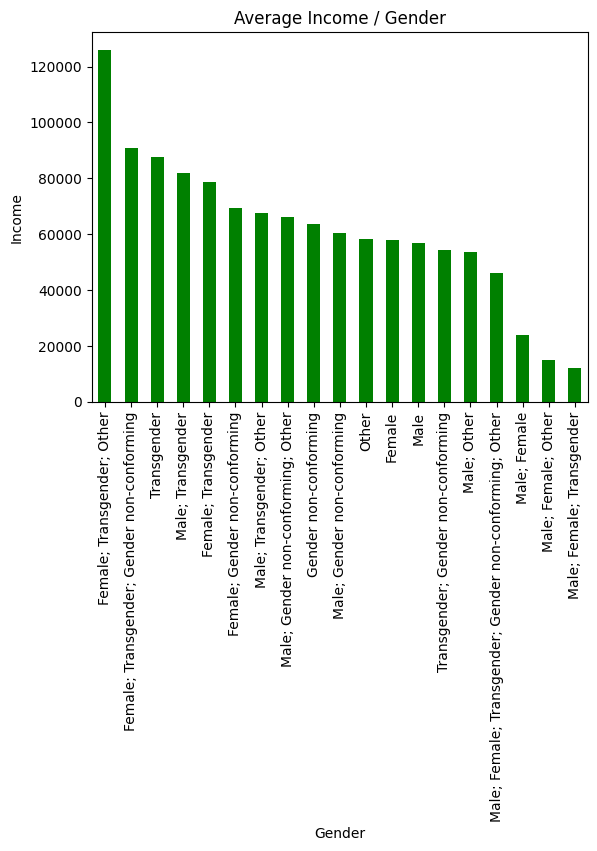

In [10]:
gender_salary_avg_sorted.plot(kind='bar', color='green')
plt.title('Average Income / Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [11]:
# Interesting, Female Transgender dominate thew graph and jump to the first place by around 30 Thousand $

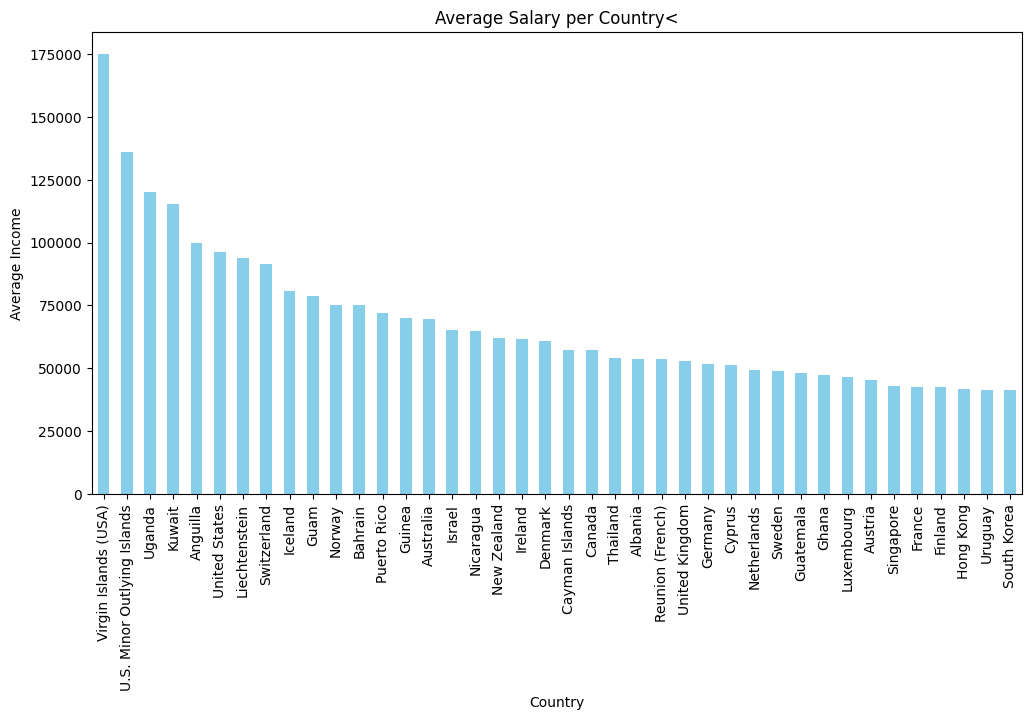

In [16]:
#calculate the average salary for every Country, i had to limit it to the top 40 countires else it could be possible the countries are not readable anymore
country_salary_avg = df.groupby('Country')['Salary'].mean()
top_20_countries = country_salary_avg.sort_values(ascending=False).head(40)
top_20_countries.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Salary per Country<')
plt.xlabel('Country')
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.show()

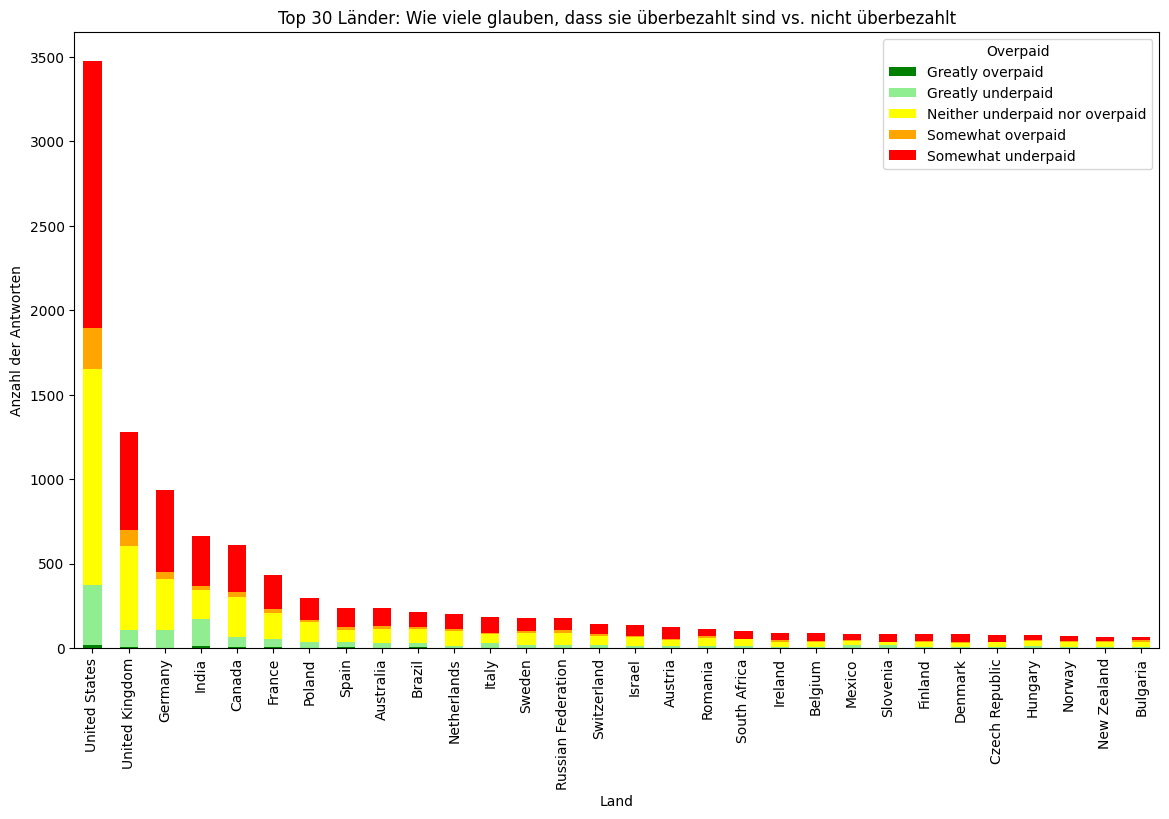

In [26]:
import matplotlib.pyplot as plt

# Zähle, wie viele glauben, dass sie überbezahlt sind und wie viele nicht
overpaid_counts = df.groupby(['Country', 'Overpaid']).size().unstack(fill_value=0)

# Berechne die Gesamtanzahl der Antworten pro Land
overpaid_counts['Total'] = overpaid_counts.sum(axis=1)

# Sortiere nach der Gesamtanzahl der Antworten und wähle die Top 30 Länder
top_30_overpaid = overpaid_counts.sort_values(by='Total', ascending=False).head(30)

# Erstelle das gestapelte Balkendiagramm für die Top 30 Länder
top_30_overpaid.drop(columns=['Total']).plot(kind='bar', stacked=True, figsize=(14, 8), color=['Green', 'lightgreen','Yellow', 'Orange','red'])

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Top 30 Länder: Wie viele glauben, dass sie überbezahlt sind vs. nicht überbezahlt')
plt.xlabel('Land')
plt.ylabel('Anzahl der Antworten')

# Drehe die x-Achsen-Beschriftungen für bessere Lesbarkeit
plt.xticks(rotation=90)

# Zeige das Diagramm an
plt.show()

In [27]:
#Interesting, even though the USA has the Highest Paygrades its also complaining about being severely underpaid